<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Libraries" data-toc-modified-id="Load-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Libraries</a></span></li><li><span><a href="#Prepare-Data" data-toc-modified-id="Prepare-Data-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Prepare Data</a></span></li><li><span><a href="#Define-Process" data-toc-modified-id="Define-Process-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Define Process</a></span></li><li><span><a href="#System-Verification" data-toc-modified-id="System-Verification-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>System Verification</a></span></li><li><span><a href="#Optimization" data-toc-modified-id="Optimization-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Optimization</a></span></li><li><span><a href="#References" data-toc-modified-id="References-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>References</a></span></li></ul></div>

# Load Libraries

Importing all required libraries

In [1]:
pip install simpy

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
import numpy as np

import simpy
import simpy.events as evt

# Prepare Data

Read and process data. Required columns are created for further process.

In [3]:
df = pd.read_csv("C:/Users/Karan/Downloads/9blocks.csv")

Convert to float

In [4]:
df = df.astype({'Distance': 'float'})
df = df.astype({'Running Time': 'float'})

         

Calculating Distance and Runnning Time

In [5]:
df['Distance']=df['Distance'].apply(lambda x: x*1000)

In [6]:
df['Running Time']=df['Running Time'].apply(lambda x: int(x*60))

In [7]:
df

Line                             From                                 To  \
0  HS2            London Euston (Block1)    London Old Oak Common (Block2)   
1  HS2    London Old Oak Common (Block2)                           Block 3   
2  HS2                           Block 3                           Block 4   
3  HS2                           Block 4                           Block 5   
4  HS2                           Block 5                           Block 6   
5  HS2                           Block 6                           Block 7   
6  HS2                           Block 7  Birmingham Interchange (Block 8)   
7  HS2  Birmingham Interchange (Block 8)                           Block 9   
8  HS2                           Block 9          Birmingham Curzon Street   

   Distance  Running Time  
0   23000.0           300  
1   24000.0           307  
2   24000.0           307  
3   24000.0           307  
4   24000.0           307  
5   24000.0           307  
6   25000.0           320  
7   21000.0           270  
8   21000.0           270

In [8]:
def timeTo(A, maxV, d):
    """
    A       constant acceleration, m/s²
    maxV    maximumum velocity, m/s
    d       distance, km
    return  time in seconds required to travel
    """
    tA = maxV/A          # time to accelerate to maxV
    dA = A*tA*tA                # distance traveled during acceleration from 0 to maxV and back to 0
    if (d < dA):                # train never reaches full speed?
        return np.sqrt(4.0*d/A)        # time needed to accelerate to half-way point then decelerate to destination
    else:
        return 2*tA + (d-dA)/maxV   # time to accelerate to maxV plus travel at maxV plus decelerate to destination

In [9]:
lines=df['Line'].unique()
dl=pd.DataFrame(lines, columns=['Line'])
dl=dl.set_index('Line')
dl

Empty DataFrame
Columns: []
Index: [HS2]

In [10]:
for i in range(len(df)):
    t1=df.at[i,'Running Time']
    df.at[i, 't']= t1
                           
df['a']=4*df['Distance']/df['t']**2

In [11]:
df

Line                             From                                 To  \
0  HS2            London Euston (Block1)    London Old Oak Common (Block2)   
1  HS2    London Old Oak Common (Block2)                           Block 3   
2  HS2                           Block 3                           Block 4   
3  HS2                           Block 4                           Block 5   
4  HS2                           Block 5                           Block 6   
5  HS2                           Block 6                           Block 7   
6  HS2                           Block 7  Birmingham Interchange (Block 8)   
7  HS2  Birmingham Interchange (Block 8)                           Block 9   
8  HS2                           Block 9          Birmingham Curzon Street   

   Distance  Running Time      t         a  
0   23000.0           300  300.0  1.022222  
1   24000.0           307  307.0  1.018578  
2   24000.0           307  307.0  1.018578  
3   24000.0           307  307.0  1.018578  
4   24000.0           307  307.0  1.018578  
5   24000.0           307  307.0  1.018578  
6   25000.0           320  320.0  0.976562  
7   21000.0           270  270.0  1.152263  
8   21000.0           270  270.0  1.152263

In [12]:
for l in lines:
    dl.at[l, 'max a']=df[df['Line']==l]['a'].max()
dl

max a
Line          
HS2   1.152263

In [13]:
df['v']=None
for i in range(len(df)):
    t=df.at[i,'t']
    d=df.at[i,'Distance']
    line=df.at[i,'Line']
    a=dl.at[line, 'max a']
    q=t**2*a**2/4-a*d
    if q<0:
        # corresponds to the case that the train never reaches v_max
        # it has to start decelerate half way through
        q=0
    df.at[i, 'v']=t*a/2-np.sqrt(q)

In [14]:
df

Line                             From                                 To  \
0  HS2            London Euston (Block1)    London Old Oak Common (Block2)   
1  HS2    London Old Oak Common (Block2)                           Block 3   
2  HS2                           Block 3                           Block 4   
3  HS2                           Block 4                           Block 5   
4  HS2                           Block 5                           Block 6   
5  HS2                           Block 6                           Block 7   
6  HS2                           Block 7  Birmingham Interchange (Block 8)   
7  HS2  Birmingham Interchange (Block 8)                           Block 9   
8  HS2                           Block 9          Birmingham Curzon Street   

   Distance  Running Time      t         a        v  
0   23000.0           300  300.0  1.022222  114.775  
1   24000.0           307  307.0  1.018578  116.627  
2   24000.0           307  307.0  1.018578  116.627  
3   24000.0           307  307.0  1.018578  116.627  
4   24000.0           307  307.0  1.018578  116.627  
5   24000.0           307  307.0  1.018578  116.627  
6   25000.0           320  320.0  0.976562   112.37  
7   21000.0           270  270.0  1.152263  155.556  
8   21000.0           270  270.0  1.152263  155.556

In [15]:
for l in lines:
    dl.at[l, 'max v']=df[df['Line']==l]['v'].max()
dl

max a       max v
Line                      
HS2   1.152263  155.555554

In [16]:
for i in range(len(df)):
    l=df.iat[i, 0]
    a=dl.at[l, 'max a']
    v=dl.at[l, 'max v']
    df.at[i, 'Drive Time']=int(timeTo(a, v, df.at[i, 'Distance']))

In [17]:
df['Dwell Time']=df['Running Time']-df['Drive Time']

In [18]:
df

Line                             From                                 To  \
0  HS2            London Euston (Block1)    London Old Oak Common (Block2)   
1  HS2    London Old Oak Common (Block2)                           Block 3   
2  HS2                           Block 3                           Block 4   
3  HS2                           Block 4                           Block 5   
4  HS2                           Block 5                           Block 6   
5  HS2                           Block 6                           Block 7   
6  HS2                           Block 7  Birmingham Interchange (Block 8)   
7  HS2  Birmingham Interchange (Block 8)                           Block 9   
8  HS2                           Block 9          Birmingham Curzon Street   

   Distance  Running Time      t         a        v  Drive Time  Dwell Time  
0   23000.0           300  300.0  1.022222  114.775       282.0        18.0  
1   24000.0           307  307.0  1.018578  116.627       289.0        18.0  
2   24000.0           307  307.0  1.018578  116.627       289.0        18.0  
3   24000.0           307  307.0  1.018578  116.627       289.0        18.0  
4   24000.0           307  307.0  1.018578  116.627       289.0        18.0  
5   24000.0           307  307.0  1.018578  116.627       289.0        18.0  
6   25000.0           320  320.0  0.976562   112.37       295.0        25.0  
7   21000.0           270  270.0  1.152263  155.556       270.0         0.0  
8   21000.0           270  270.0  1.152263  155.556       270.0         0.0

In [19]:
df['Dwell Time'].mean()

14.777777777777779

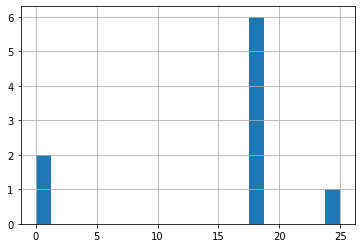

In [20]:
df['Dwell Time'].hist(bins=20)

In [21]:
df=df.drop(columns=['t', 'a', 'v', 'Running Time'])

In [22]:
df.head()

Line                           From                               To  \
0  HS2          London Euston (Block1)  London Old Oak Common (Block2)   
1  HS2  London Old Oak Common (Block2)                         Block 3   
2  HS2                         Block 3                         Block 4   
3  HS2                         Block 4                         Block 5   
4  HS2                         Block 5                         Block 6   

   Distance  Drive Time  Dwell Time  
0   23000.0       282.0        18.0  
1   24000.0       289.0        18.0  
2   24000.0       289.0        18.0  
3   24000.0       289.0        18.0  
4   24000.0       289.0        18.0

# Define Process

Defining the process

In [23]:
import random
def poissonEvents(λ=None, N=None, T=None, 
                  plot=True, events=None, figsize=None):

    if events!=None:
        N = len(events)
        
    if N!=None and T==None and λ!=None:
        T = int(N/λ)
    elif N==None and T!=None and λ!=None:
        N = int(λ*T)
    elif N!=None and T!=None and λ==None:
        λ = N/T
    
   
    if events==None:
        u = [ random.uniform(0, 1) for i in range(N) ]
        P = list(np.cumsum(list(map(
                lambda x: -math.log(1-x)/λ, u))))
    else:
        P = events
        
    if plot:
  
        if figsize!=None:
            width, height = figsize
        else:
            width, height = 10, 6
            
        fig, ax=plt.subplots(1,1)
        fig.set_figwidth(width)
        fig.set_figheight(height)
        
        def X(l):
            
            xmax = max(int(N/λ),math.ceil(max(l)))
            
            def double(l):
                return [] if l==[] \
                        else [l[0], l[0]]+double(l[1:])
    
            return [0]+double(l)+[xmax]
        
        def Y(l):
    
            def steps(l, n):
                return [] if l==[] \
                        else [n, n]+steps(l[1:], n+1)
    
            return [0, 0]+steps(l, 1)
    
        x = X(P)
        y = Y(P)

        ax.set_title(f"Poisson Process λ={λ:5.3f} n={N:d}")
        ax.set_xlim(min(x), max(x))
        ax.set_ylim(min(y), max(y))
        ax.yaxis.set_major_locator(
            mpl.ticker.MaxNLocator(integer=True))
        ax.plot(x, y, lw=3)
        ax.plot(x, list(map(lambda x:λ*x, x)))
        ax.grid(True)
        
        
    return P

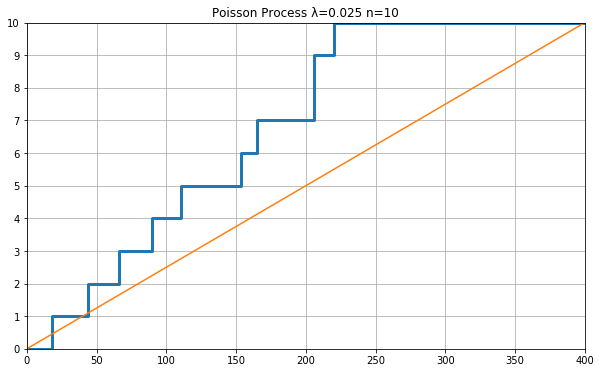

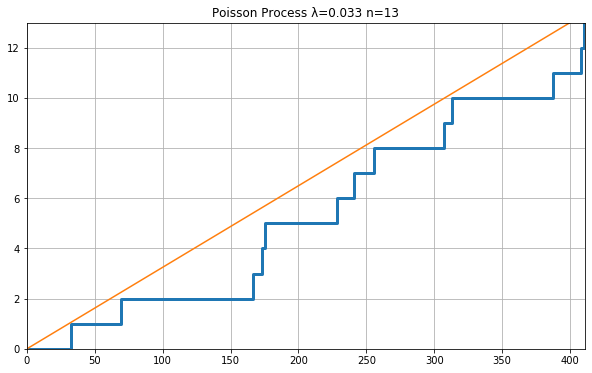

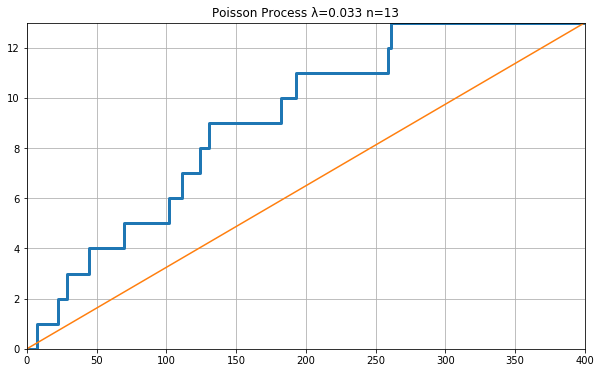

In [24]:
random.seed(16)
failure=poissonEvents(N=10,T = 400)
d1= list(map(int,failure))

random.seed(27)
failure=poissonEvents(N=13,T = 400)
d2= list(map(int,np.diff(failure)))

random.seed(39)
failure=poissonEvents(N=13,T = 400)
d3= list(map(int,np.diff(failure)))



In [25]:
d1

[17, 44, 65, 89, 110, 153, 165, 205, 206, 220]

In [26]:
class Train(object):  
    def __init__(self, i, line, route,d1,d2,d3,maxPassengers=400):
        self.name = line+'-'+' [Train '+f"{i:2d}"+']'
        self.line=line
        self.route = route
        self.p     = 0
        self.maxP  = maxPassengers
        self.i = i
        self.d1 = d1
        self.d2 = d2
        self.d3 = d3
        self.passengers = {}
        self.td = 0
        self.tot = 0
    def process(self):
        here = self.route[0]   # starting location
        
        
        for dest in self.route[1:]:
            data=df[df['Line']==self.line][df['From ']==here]
            drivetime=data.iloc[0].at['Drive Time']
            dwelltime=data.iloc[0].at['Dwell Time']
            yield env.timeout(dwelltime)
            print(f"{now():s} {self.name:s} dep {here:s} for {dest:s}")
            here=dest
            yield env.timeout(drivetime)
            self.passengers.update({f"{self.name}":self.d1[self.i]})
            
            if here not in ["Block 3","Block 4","Birmingham Curzon Street"]:                   
                print(f"{now():s} {self.name:s} arr {here:s}")
                yield env.process(self.getOff(self.d1[self.i]))
                self.td = self.d1[self.i]-self.d2[self.i]               
                        
                yield env.process(self.getOn(self.d3[self.i]))
                self.td += self.d3[self.i]
                self.td = self.passengers[f"{self.name}"]
                self.i +-1                   
            else:
                print(f"{now():s} {self.name:s} arr {here:s}")
            
            self.td= dwelltime+drivetime
            self.tot += self.td            
        print(self.passengers)                       
        print(sum(self.passengers.values()))
        print(self.tot)
    def getOff(self, num):
        if self.p >= num:
            print(f"{num:d} passengers got off")
            self.p -= num
        else:
            num = self.p
            print(f"train is empty - only {num:d} passengers got off")
            self.p = 0
            yield env.timeout(1)

    def getOn(self, num):
        if (self.maxP is None) or (self.p + num <= self.maxP):
            print(f"{num:d} passengers got on")
            self.p += num
        else:
            num = self.maxp - self.p
            print(f"train is full - only {num:d} passengers got on")
            self.p = self.maxp
            yield env.timeout(1)



In [27]:
def line(d1,d2,d3,name='HS2', start=6*3600, stop=7*3600, timing=600):
    data=df[df['Line']==name]
    stations=data['From '].to_list()
    stations+=[data['To'].to_list()[-1]]
   # random.seed(1)
   ##d1= list(map(int,failure))
   
    yield env.timeout(start-env.now) # the line starts operating at 6am
    for i in range(int((stop-start)/timing)):
        t=Train(i, name, stations,d1,d2,d3)
        env.process(t.process())
        env.process(t.getOn(d1[i]))
        yield env.timeout(timing)

In [28]:
def daytime(t):
    t=int(t)
    return f"{t//3600:02d}:{(t%3600)//60:02d}:{t%60:02d}"
def now():
    return daytime(env.now)

# System Verification

Check to see if the system works as expected

In [29]:
env = simpy.Environment()

In [30]:
env.process(line(d1,d2,d3))
env.run()

17 passengers got on
06:00:18 HS2- [Train  0] dep London Euston (Block1) for London Old Oak Common (Block2)
06:05:00 HS2- [Train  0] arr London Old Oak Common (Block2)
17 passengers got off
14 passengers got on
06:05:18 HS2- [Train  0] dep London Old Oak Common (Block2) for Block 3
44 passengers got on
06:10:07 HS2- [Train  0] arr Block 3
06:10:18 HS2- [Train  1] dep London Euston (Block1) for London Old Oak Common (Block2)
06:10:25 HS2- [Train  0] dep Block 3 for Block 4
06:15:00 HS2- [Train  1] arr London Old Oak Common (Block2)
44 passengers got off
6 passengers got on
06:15:14 HS2- [Train  0] arr Block 4
06:15:18 HS2- [Train  1] dep London Old Oak Common (Block2) for Block 3
06:15:32 HS2- [Train  0] dep Block 4 for Block 5
65 passengers got on
06:20:07 HS2- [Train  1] arr Block 3
06:20:18 HS2- [Train  2] dep London Euston (Block1) for London Old Oak Common (Block2)
06:20:21 HS2- [Train  0] arr Block 5
train is empty - only 14 passengers got off
14 passengers got on
06:20:25 HS2- [T

In [31]:
simdata = pd.read_csv("C:/Users/Karan/Downloads/optin.csv") 

In [32]:
simdata

trains  blocks  time  passengers
0       5       5  5499         442
1       6       6  5673         478
2       7       7  5768        1445
3       8       8  5773         698
4       9       9  5884        1610
5      10      10  6232        1279
6      12      12  6132        1936

# Optimization

Mininmize the overall average travelling time

In [33]:
import statsmodels.api as statmod
from sklearn.linear_model import LinearRegression
import numpy as np

pd.options.mode.chained_assignment = None
tar = pd.DataFrame(simdata['time'])
pred = pd.DataFrame(simdata[['blocks','trains']])
pred = statmod.add_constant(pred)

model =statmod.OLS(tar,pred).fit()
predict = model.predict(pred)
model.summary()

C:\Users\Karan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     28.09
Date:                Mon, 11 May 2020   Prob (F-statistic):            0.00319
Time:                        20:11:10   Log-Likelihood:                -41.600
No. Observations:                   7   AIC:                             87.20
Df Residuals:                       5   BIC:                             87.09
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5054.1721    156.009     32.397      0.000    4653.139    5455.205
blocks        48.9631      9.239      5.300      0.003      25.214      72.712
trains        48.9631      9.239      5.300      0.003      25.214      72.712
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   2.767
Prob(Omnibus):                    nan   Jarque-Bera (JB):                1.648
Skew:                           1.178   Prob(JB):                        0.439
Kurtosis:                       3.310   Cond. No.                     5.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [34]:
import matplotlib as mp
import matplotlib.pyplot as plt
import math
import numpy as np

def f (x,y):
    return 5130.0274 - 42.0377*x + 42.0377*y

In [35]:
import random
random.seed(0)


def monte_carlo(n, xmin=6, xmax=12, ymin=5, ymax=11):
    x=[ random.randint(xmin,xmax) for i in range(n)]
    y=[ random.randint(ymin,ymax) for i in range(n)]
    xp=[ x[0] ]
    yp=[ y[0] ]
    fmin = f(xp[0], yp[0])
    for i in range(1, len(x)):
        fi=f(x[i],y[i])
        if fi<fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi
        xs = np.linspace(xmin,xmax, 100)
        ys = np.linspace(ymin,ymax, 100)
        xx, yy = np.meshgrid(xs, ys)
        z=f(xx, yy)


        fig, ax = plt.subplots(1, 1)
        fig.set_figwidth(6)
        fig.set_figheight(5)
        cs = ax.contourf(xs, ys, z, 100)
        fig.colorbar(cs, ax=ax)


        plt.scatter(x, y, c='blue', marker='.')
        plt.plot(xp, yp, c='green')
    return len(xp), xp[-1], yp[-1], f(xp[-1], yp[-1])
        







C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

(5, 12, 5, 4835.7635)

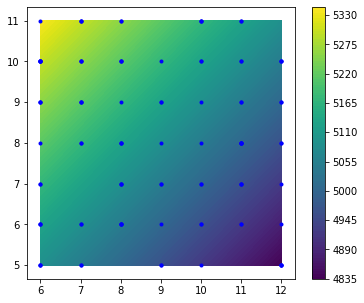

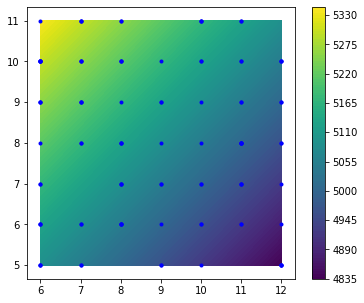

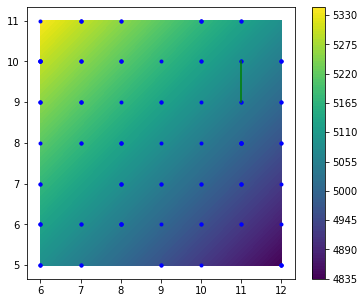

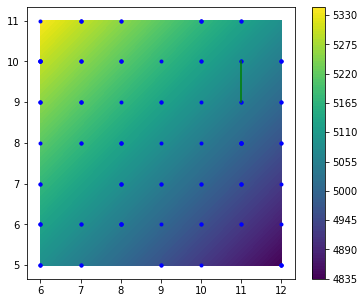

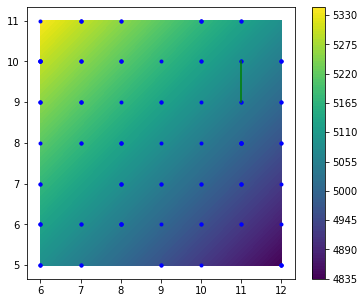

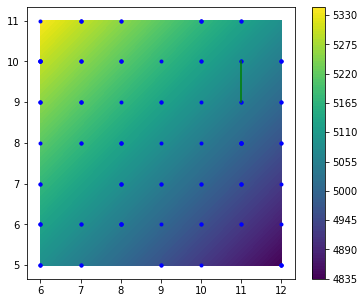

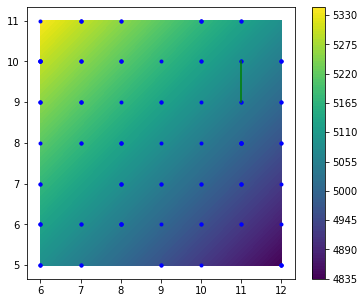

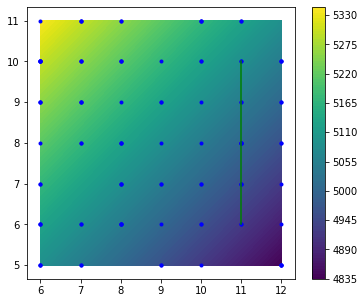

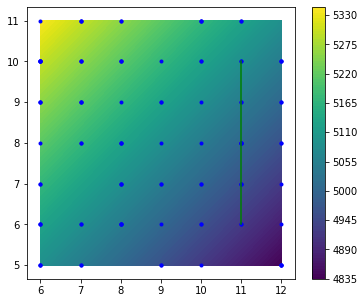

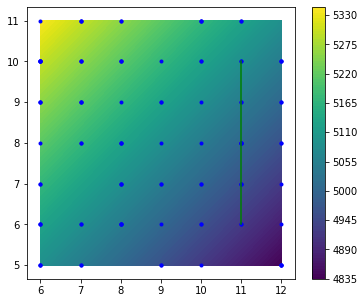

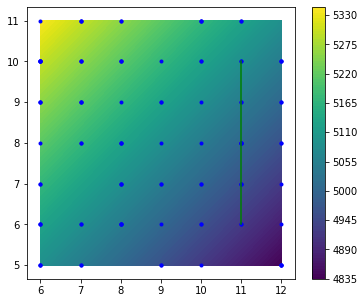

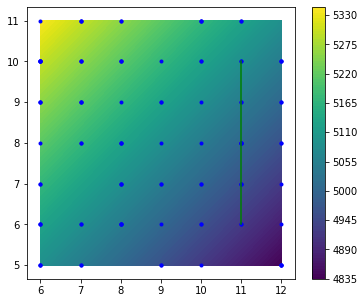

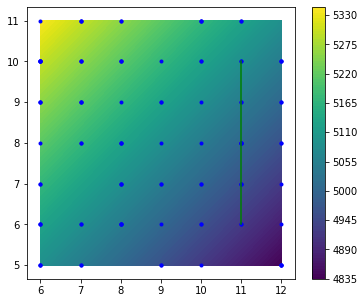

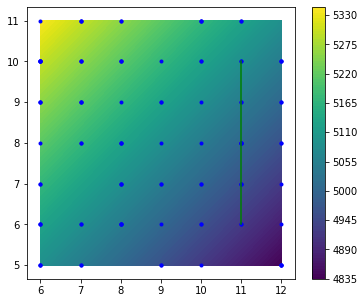

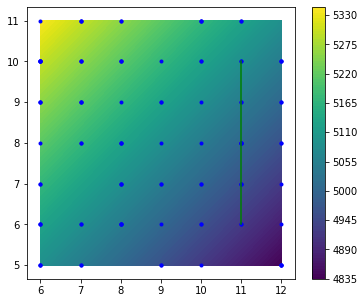

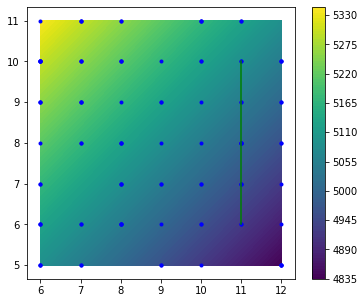

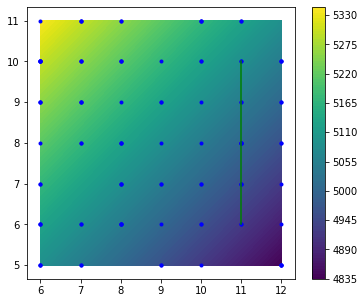

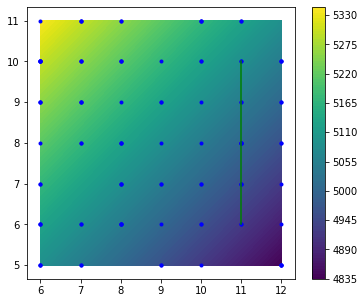

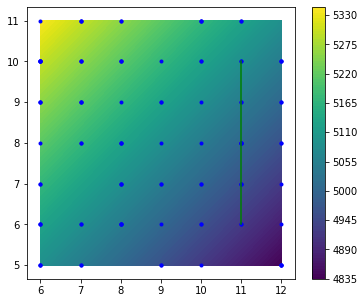

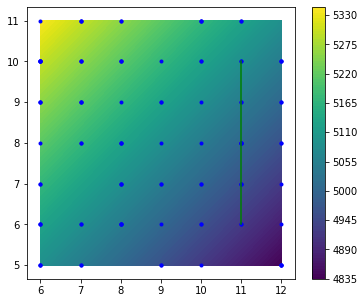

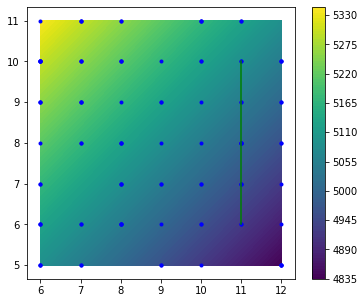

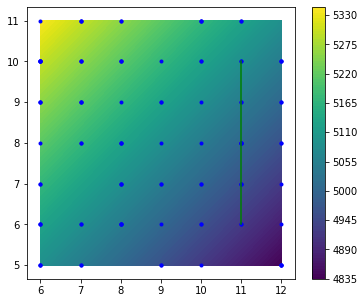

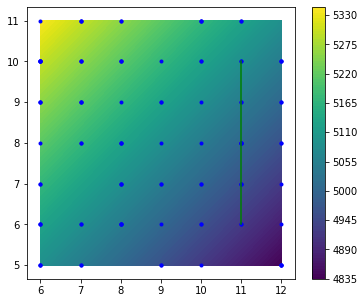

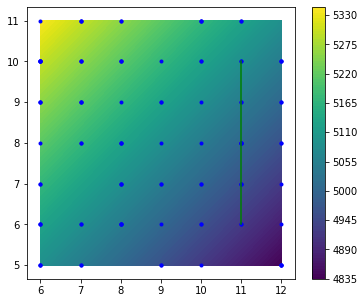

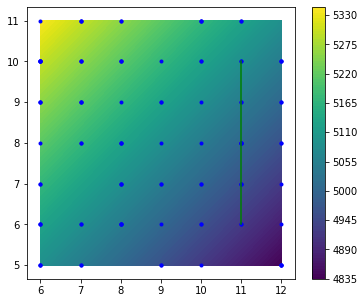

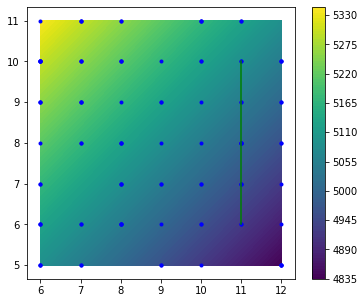

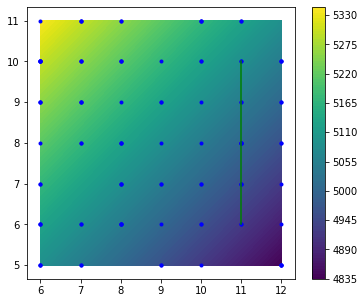

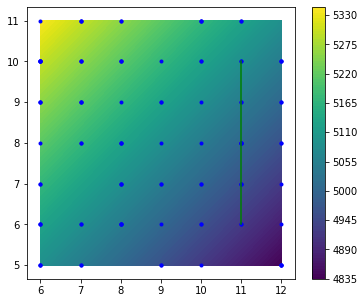

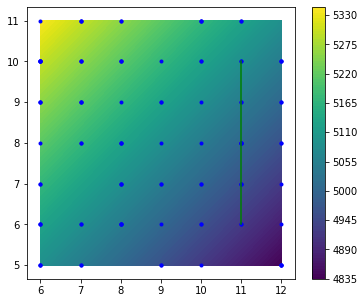

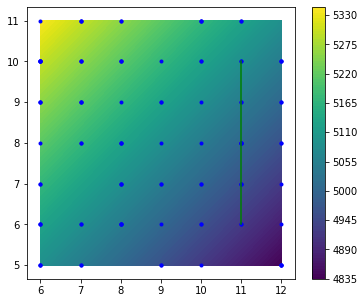

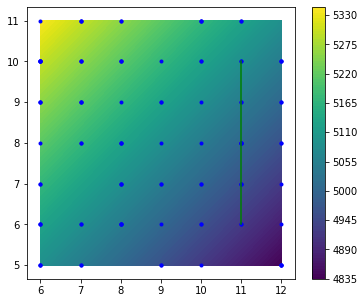

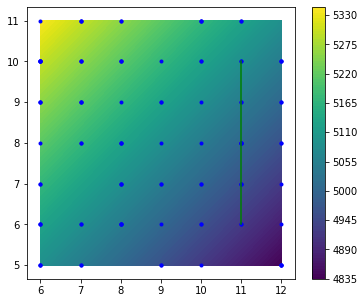

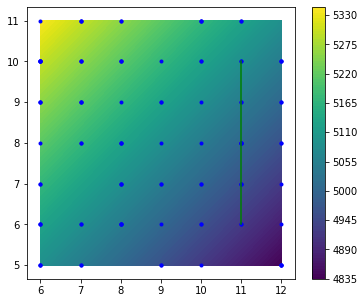

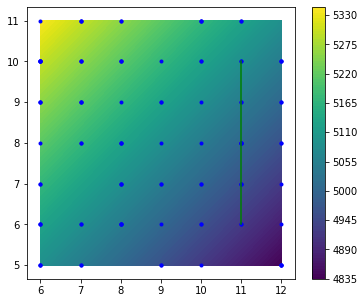

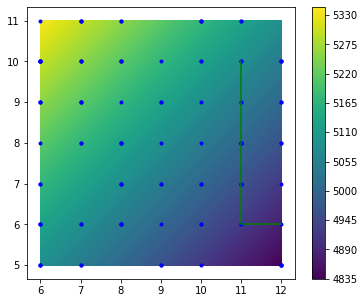

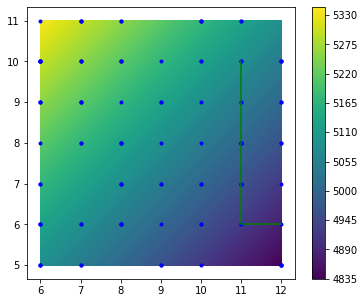

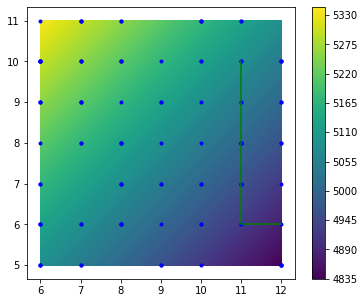

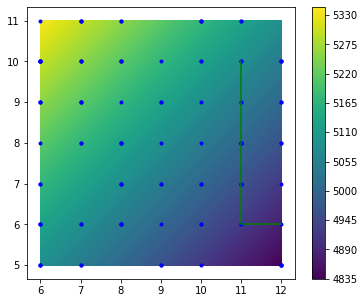

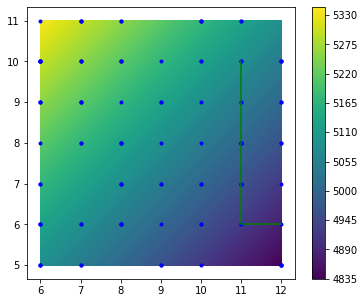

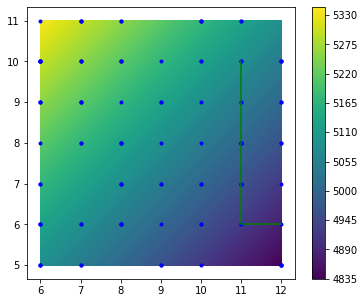

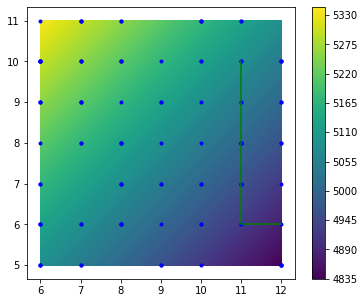

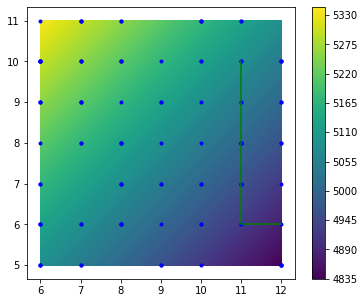

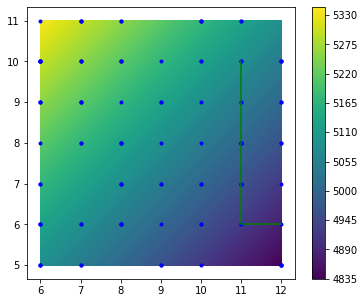

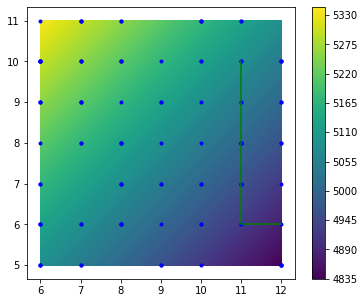

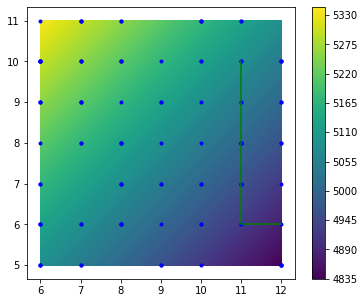

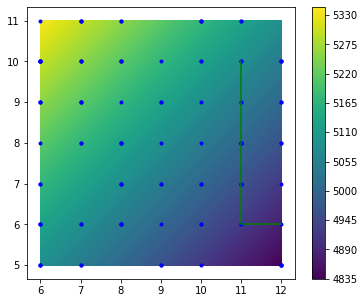

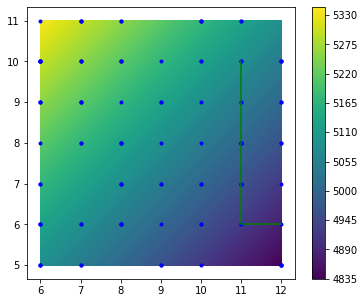

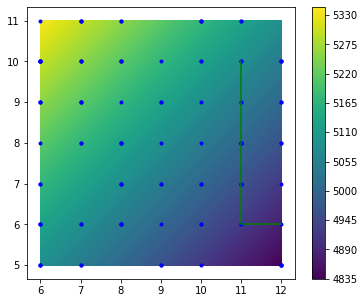

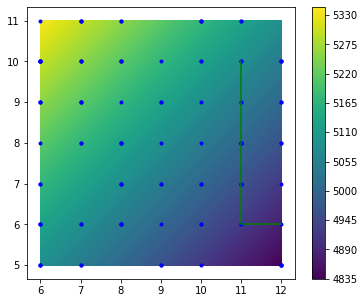

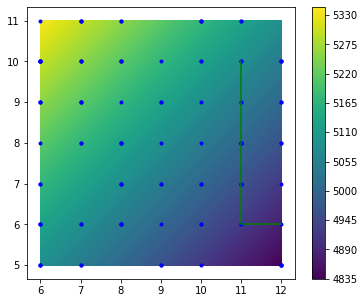

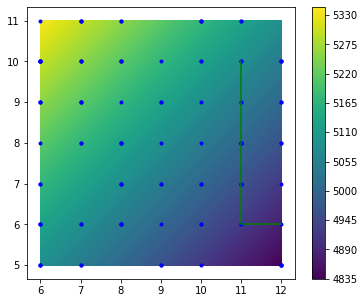

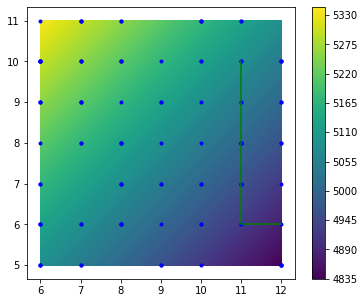

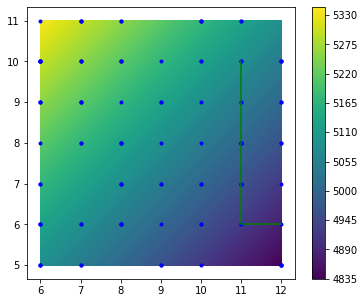

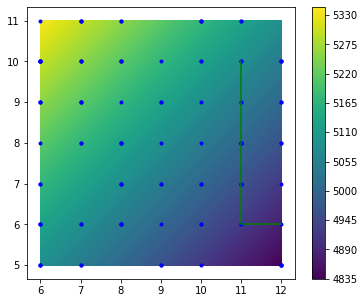

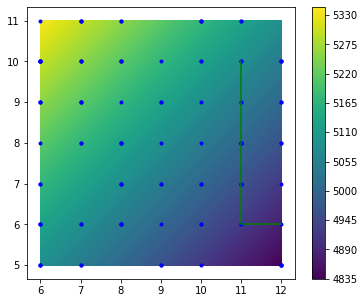

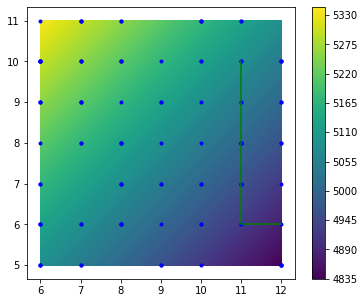

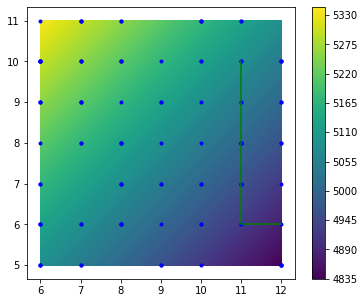

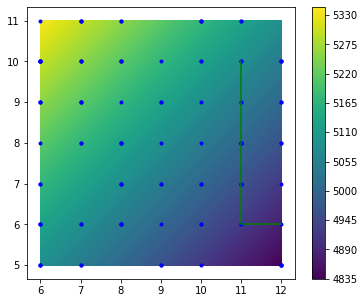

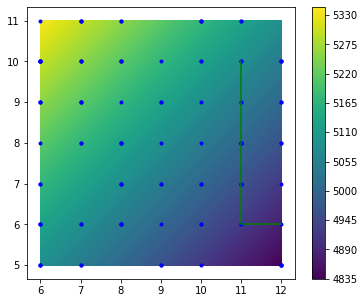

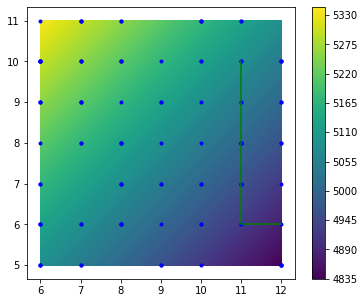

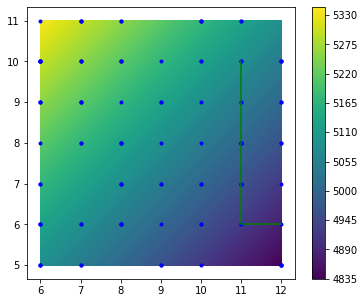

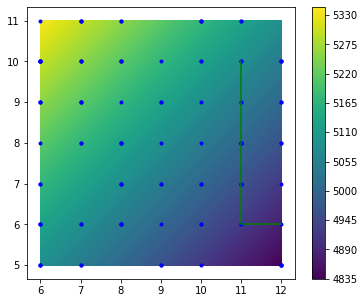

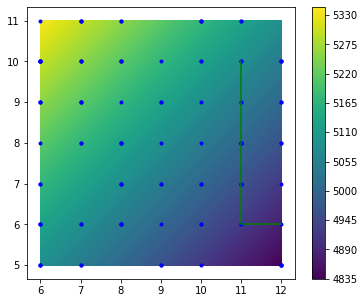

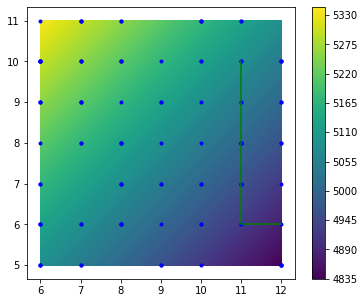

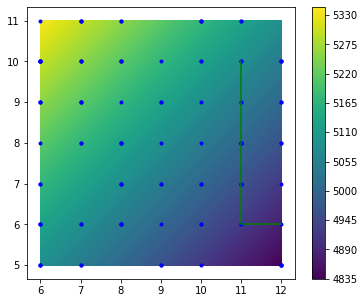

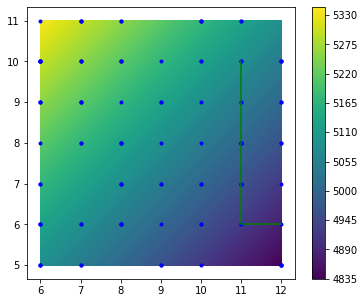

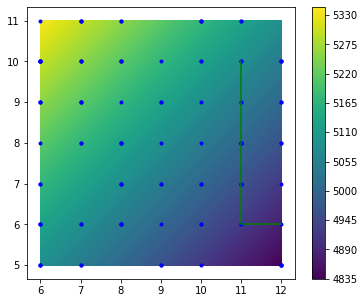

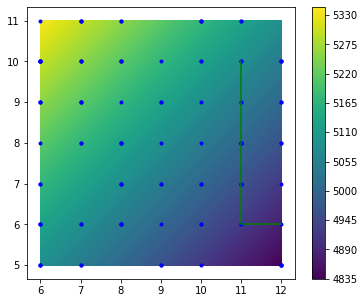

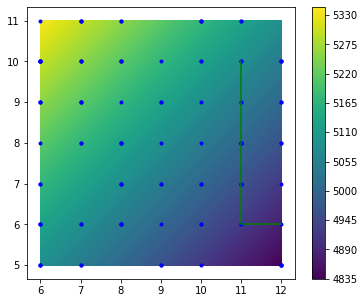

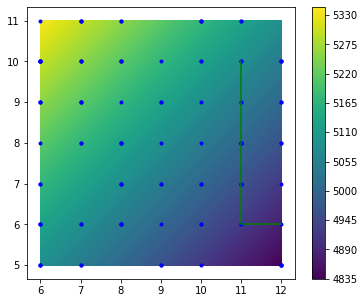

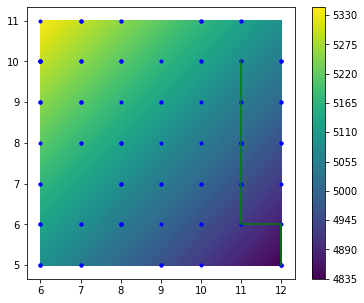

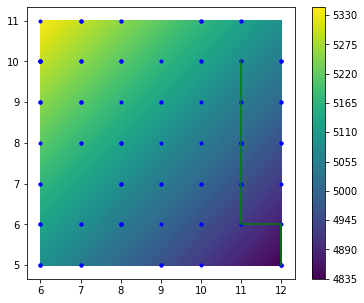

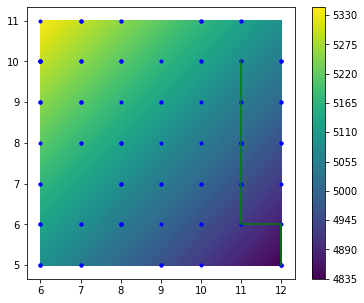

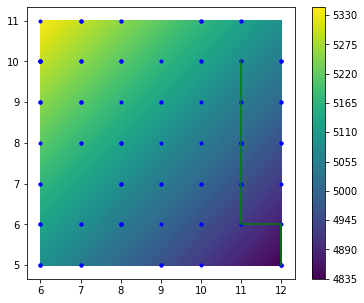

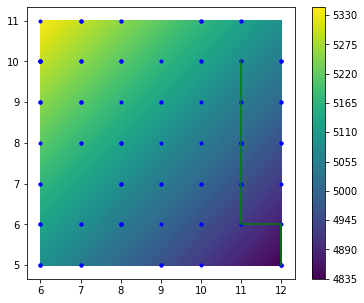

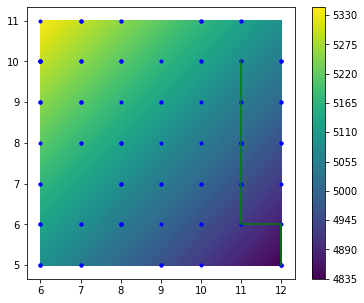

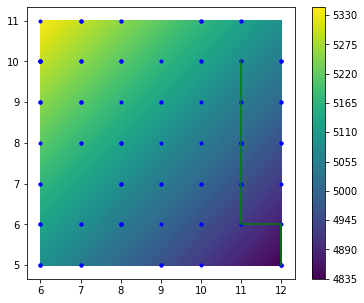

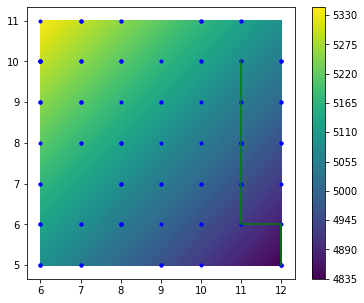

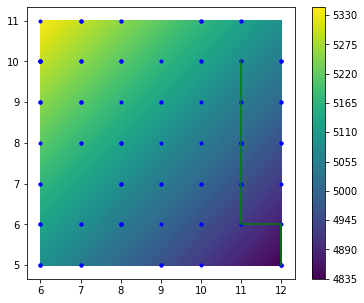

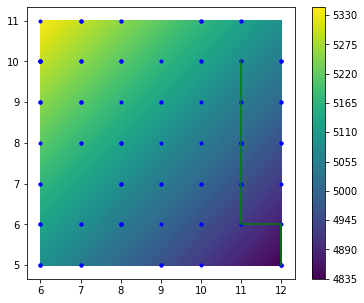

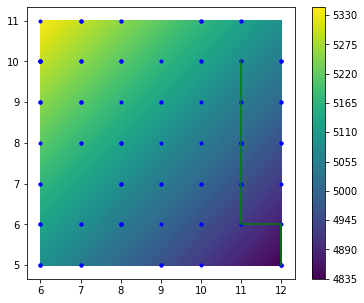

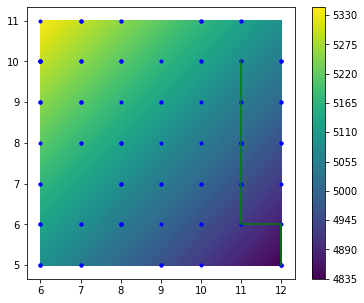

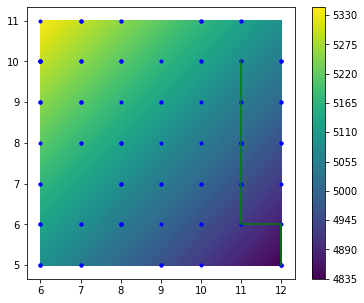

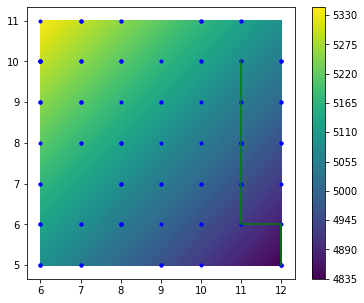

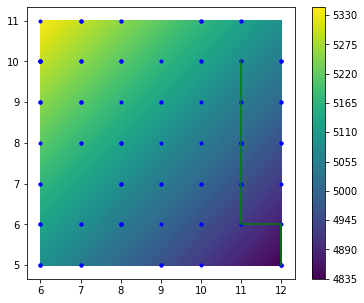

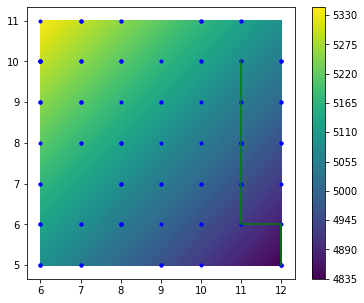

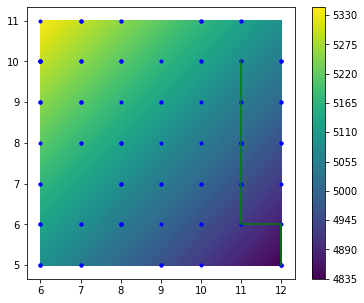

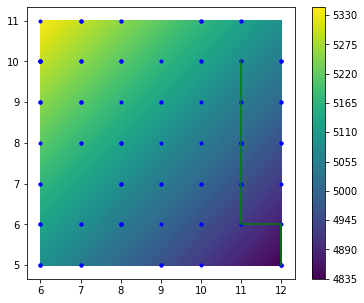

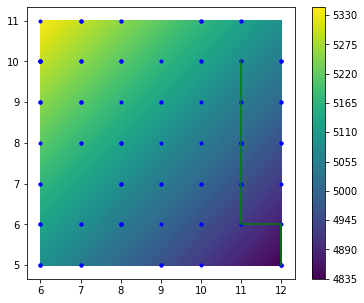

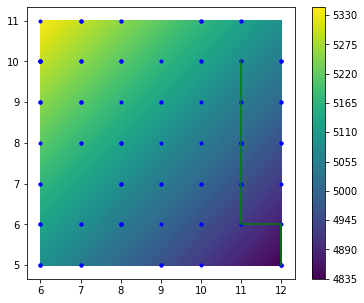

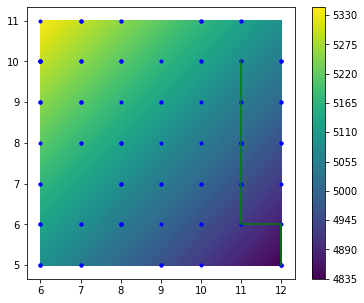

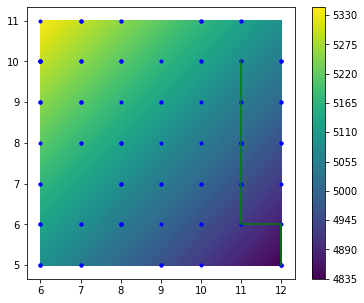

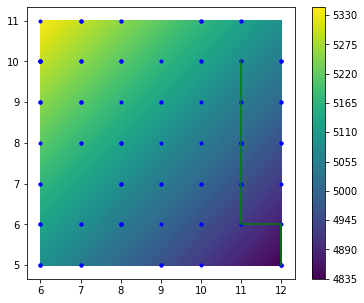

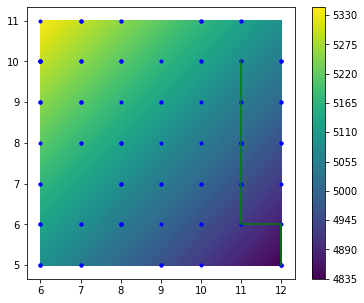

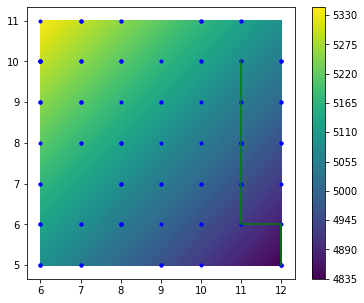

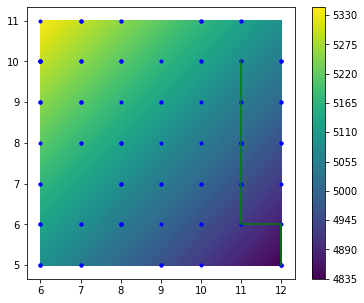

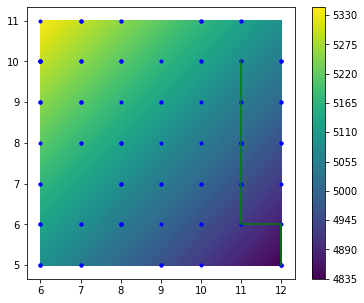

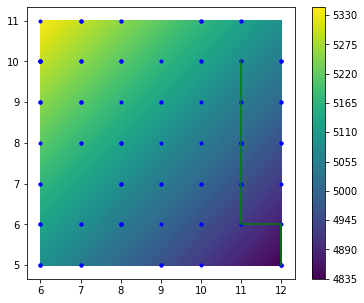

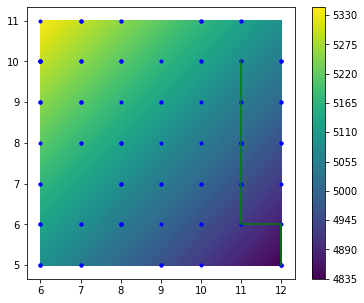

In [36]:
random.seed(42)
monte_carlo(100)

Maximise the throughput of passengers in peak hours

In [37]:
import statsmodels.api as statmod
from sklearn.linear_model import LinearRegression
import numpy as np

pd.options.mode.chained_assignment = None
tar = pd.DataFrame(simdata['passengers'])
pred = pd.DataFrame(simdata[['blocks','trains']])
pred = statmod.add_constant(pred)

model =statmod.OLS(tar,pred).fit()
predict = model.predict(pred)
model.summary()

C:\Users\Karan\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 7 samples were given.
  "samples were given." % int(n), ValueWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             passengers   R-squared:                       0.685
Model:                            OLS   Adj. R-squared:                  0.622
Method:                 Least Squares   F-statistic:                     10.87
Date:                Mon, 11 May 2020   Prob (F-statistic):             0.0215
Time:                        20:11:37   Log-Likelihood:                -50.007
No. Observations:                   7   AIC:                             104.0
Df Residuals:                       5   BIC:                             103.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -521.9713    518.495     -1.007      0.360   -1854.806     810.863
blocks       101.2439     30.705      3.297      0.022      22.313     180.174
trains       101.2439     30.705      3.297      0.022      22.313     180.174
==============================================================================
Omnibus:                          nan   Durbin-Watson:                   3.599
Prob(Omnibus):                    nan   Jarque-Bera (JB):                0.578
Skew:                           0.548   Prob(JB):                        0.749
Kurtosis:                       2.117   Cond. No.                     5.85e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.94e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [38]:
import matplotlib as mp
import matplotlib.pyplot as plt
import math
import numpy as np

def f (x,y):
    return 566.1644 - 103.0240*x + 103.0240	*y

In [39]:
import random
random.seed(0)


def monte_carlo(n, xmin=7, xmax=15, ymin=7, ymax=11):
    x=[ random.randint(xmin,xmax) for i in range(n)]
    y=[ random.randint(ymin,ymax) for i in range(n)]
    xp=[ x[0] ]
    yp=[ y[0] ]
    fmin = f(xp[0], yp[0])
    for i in range(1, len(x)):
        fi=f(x[i],y[i])
        if fi<fmin:
            xp += [x[i]]
            yp += [y[i]]
            fmin = fi
        xs = np.linspace(xmin,xmax, 100)
        ys = np.linspace(ymin,ymax, 100)
        xx, yy = np.meshgrid(xs, ys)
        z=f(xx, yy)


        fig, ax = plt.subplots(1, 1)
        fig.set_figwidth(6)
        fig.set_figheight(5)
        cs = ax.contourf(xs, ys, z, 100)
        fig.colorbar(cs, ax=ax)


        plt.scatter(x, y, c='blue', marker='.')
        plt.plot(xp, yp, c='green')
    return len(xp), xp[-1], yp[-1], abs(f(xp[-1], yp[-1]))
        

C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
C:\Users\Karan\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_op

(3, 15, 7, 258.0276000000001)

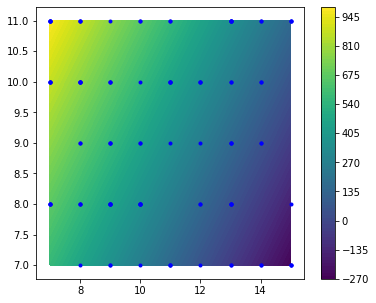

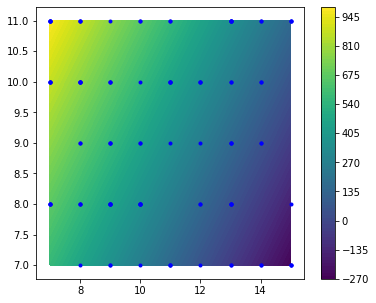

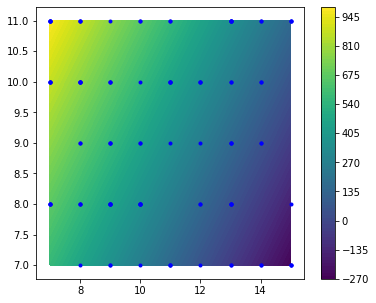

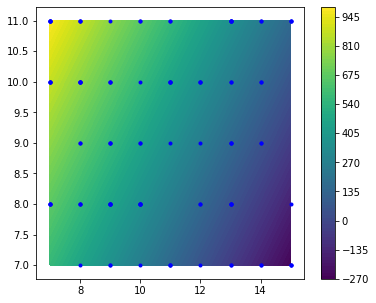

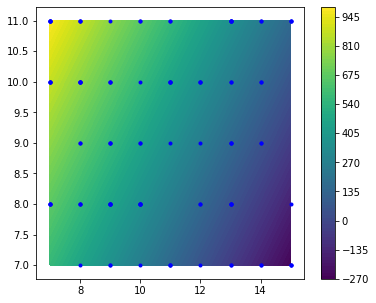

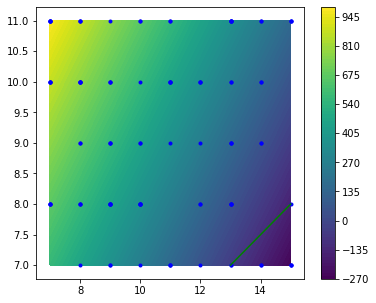

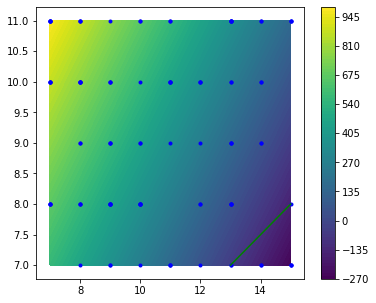

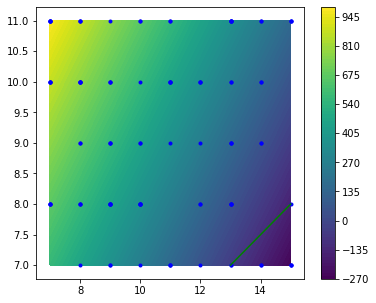

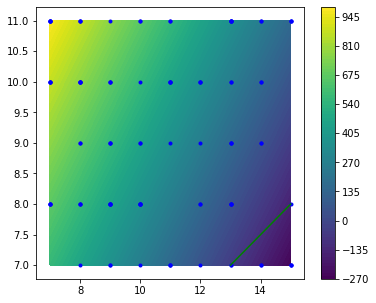

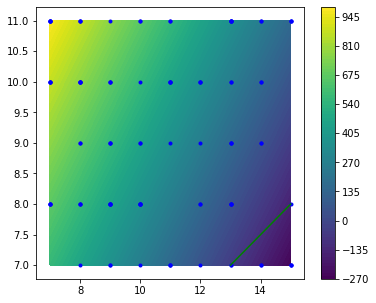

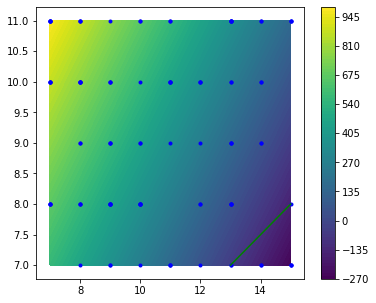

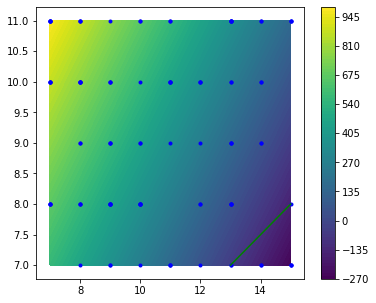

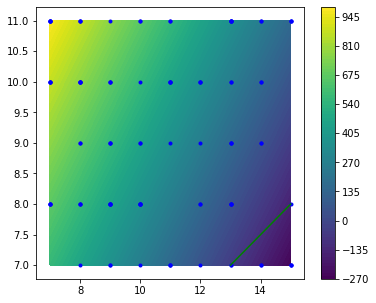

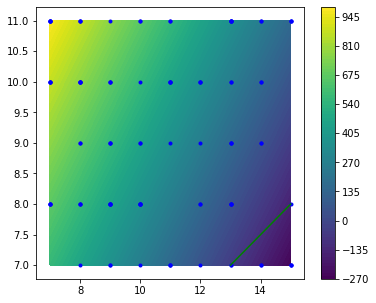

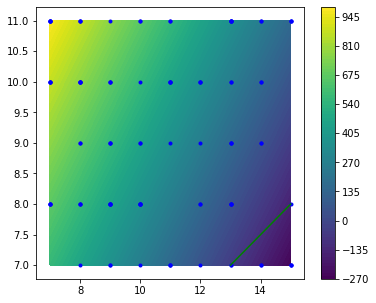

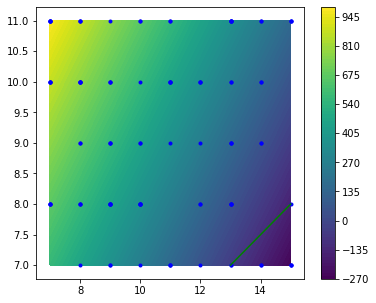

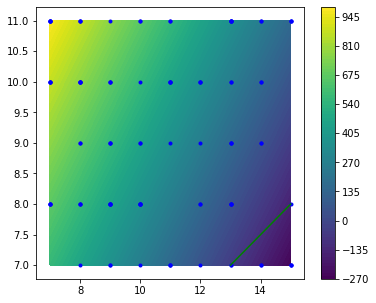

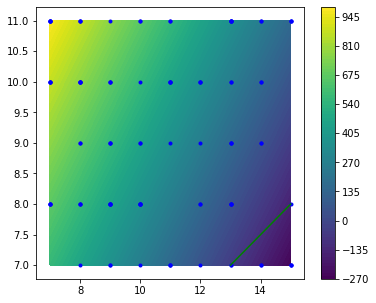

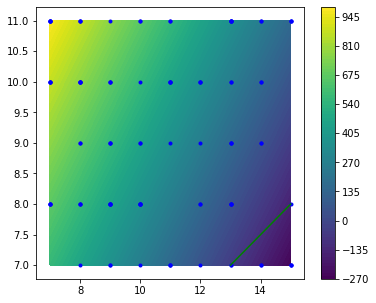

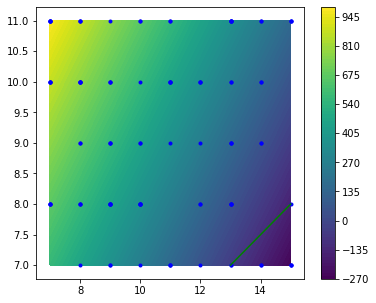

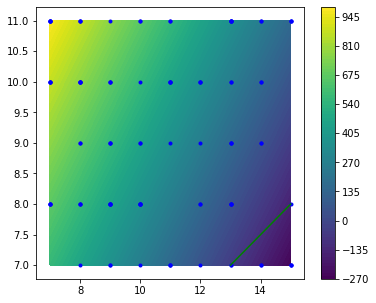

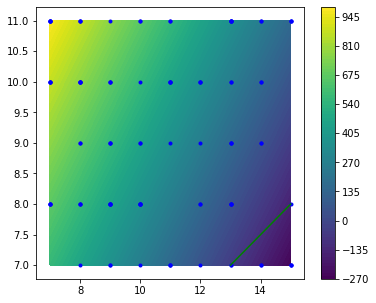

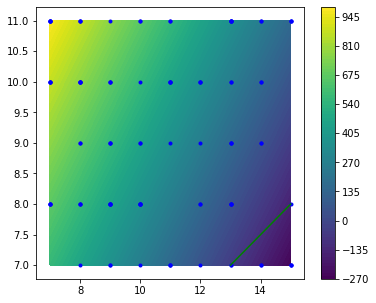

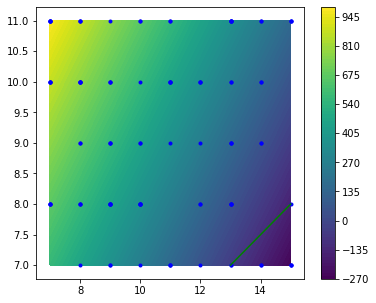

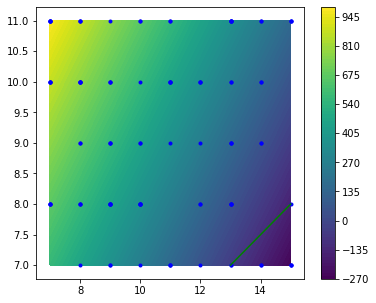

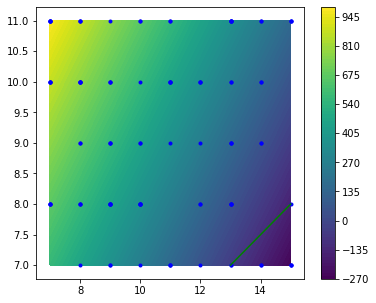

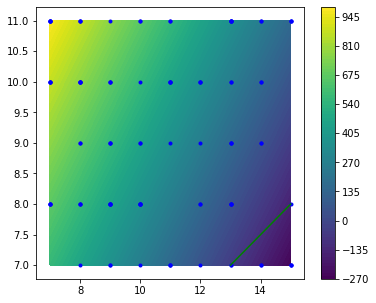

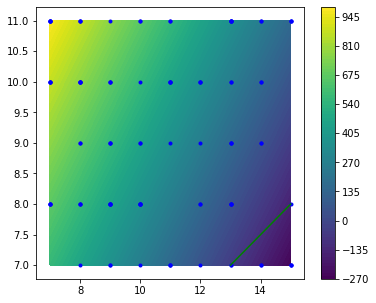

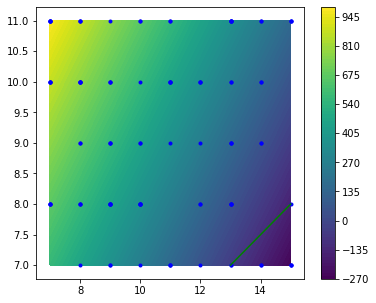

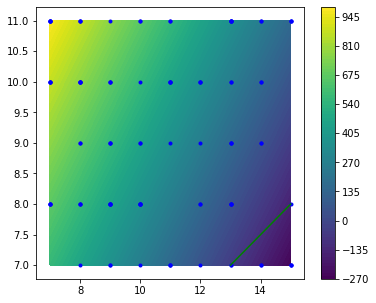

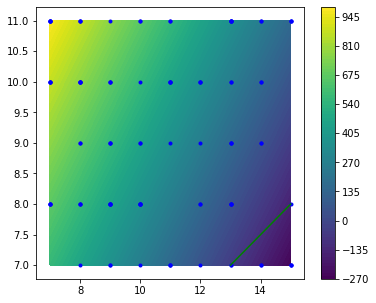

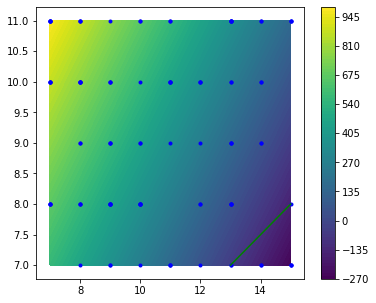

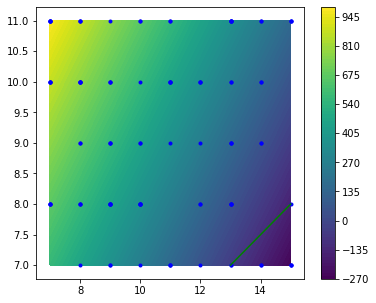

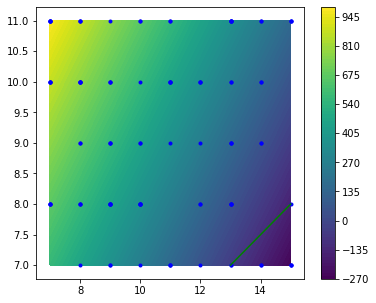

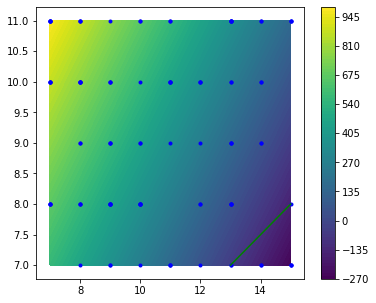

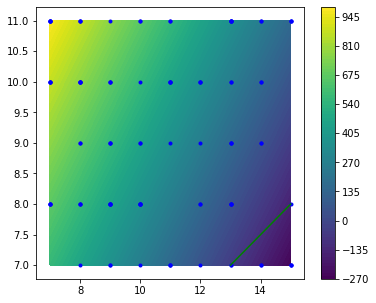

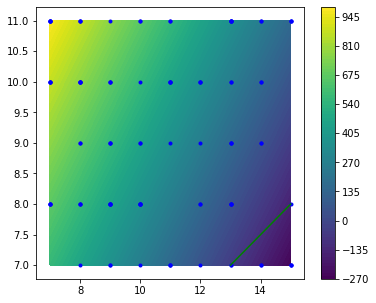

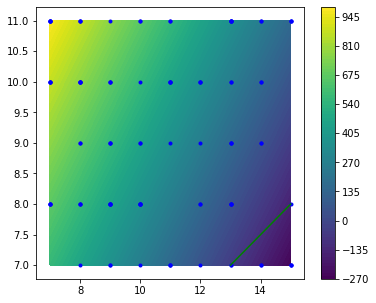

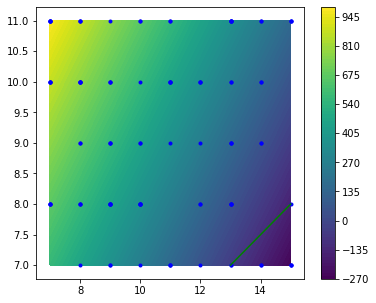

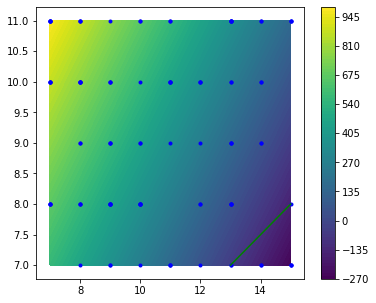

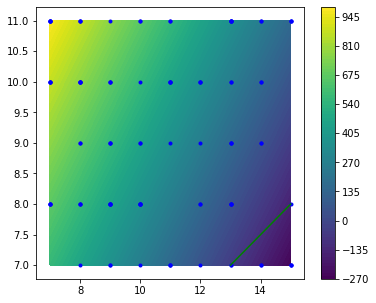

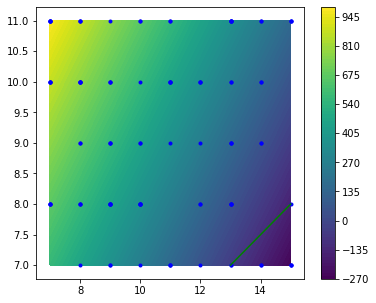

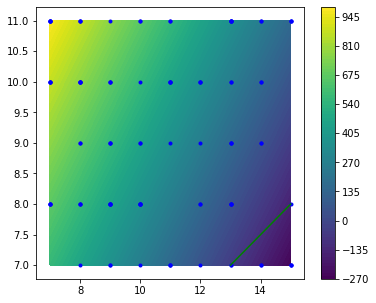

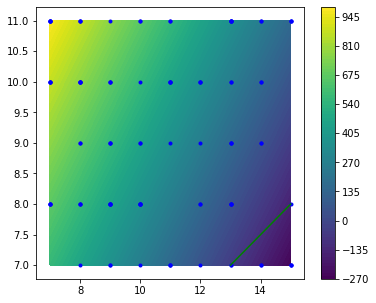

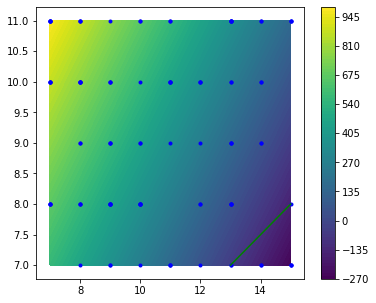

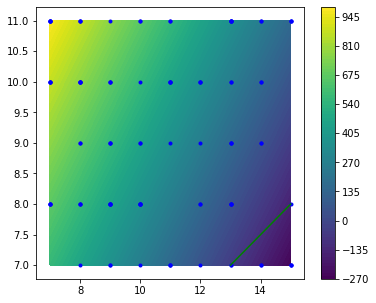

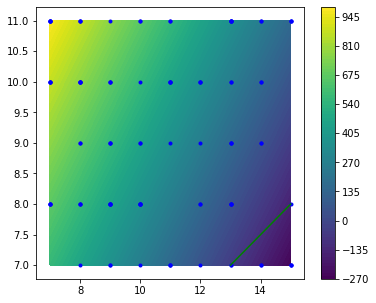

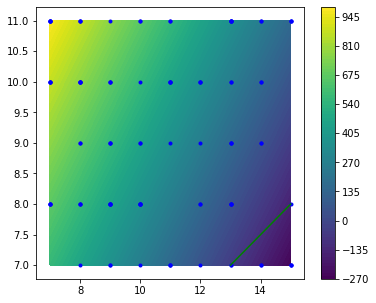

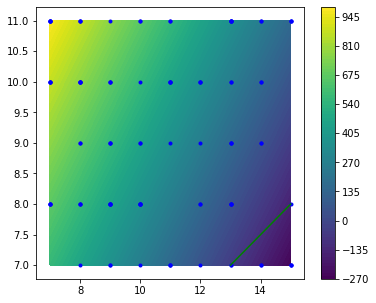

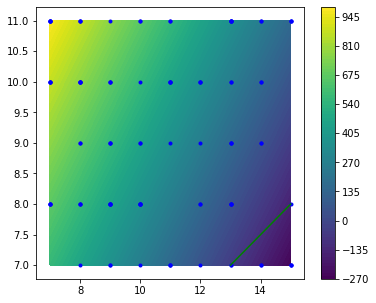

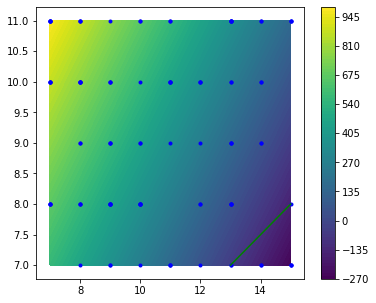

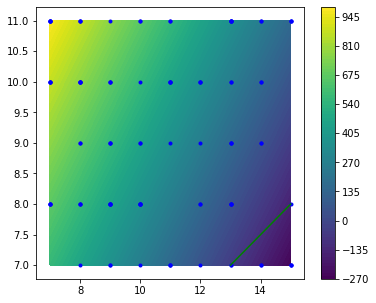

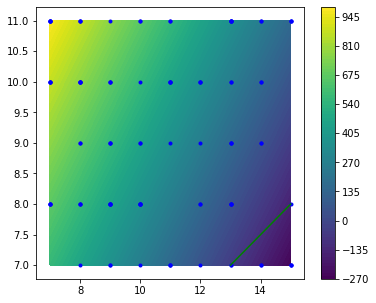

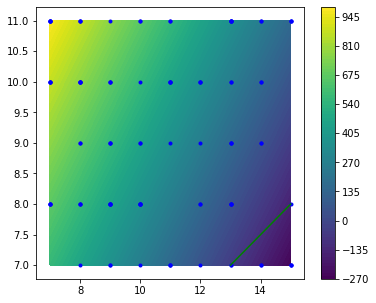

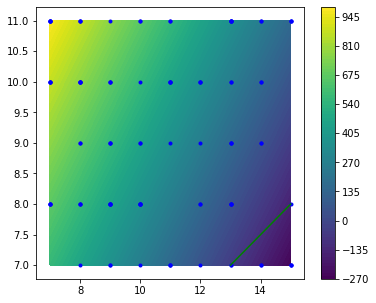

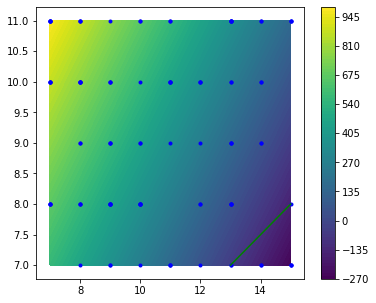

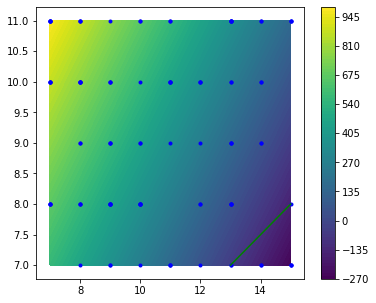

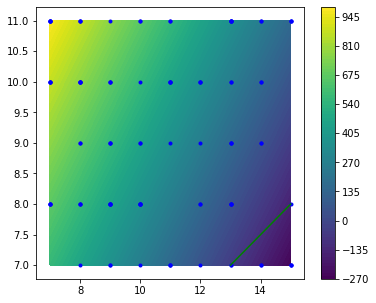

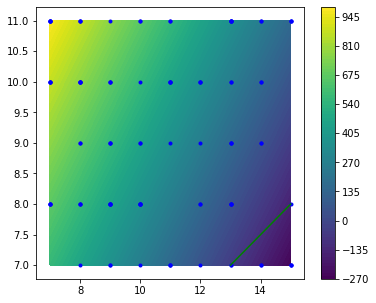

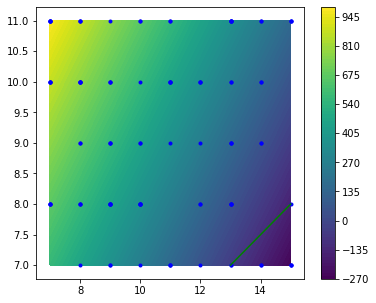

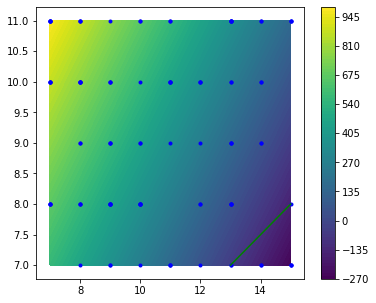

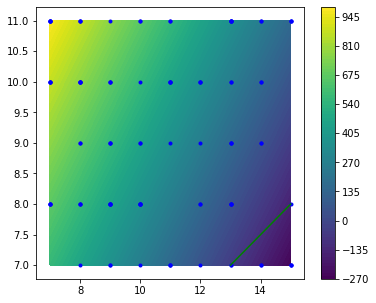

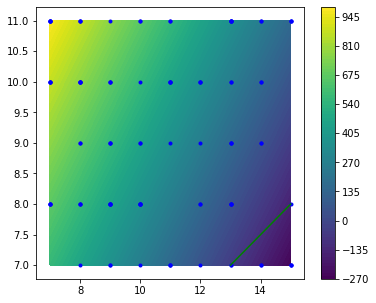

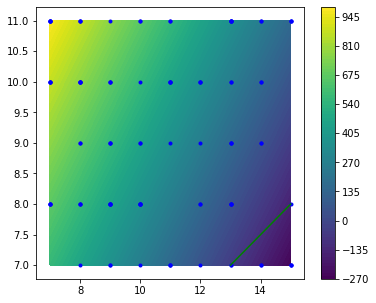

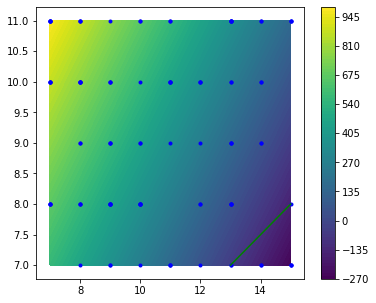

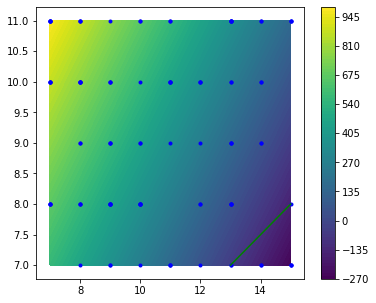

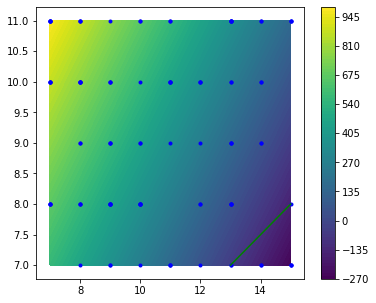

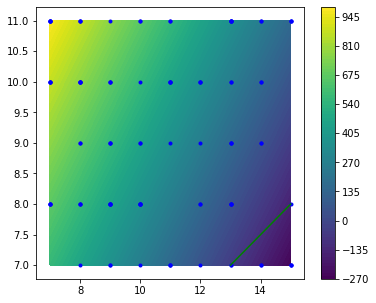

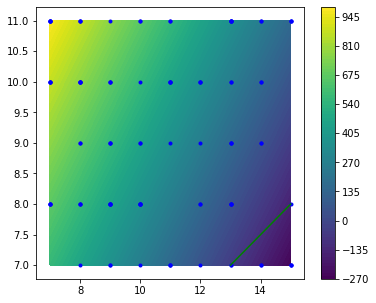

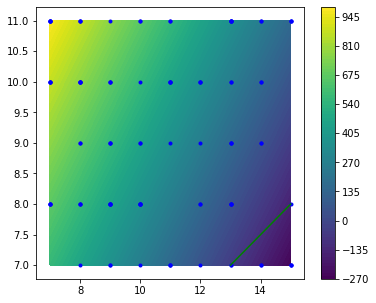

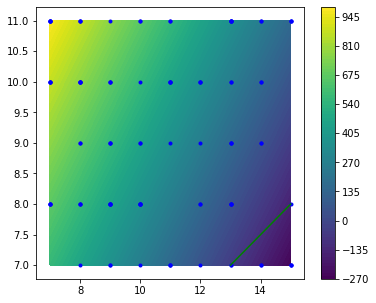

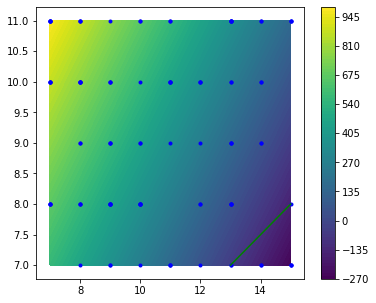

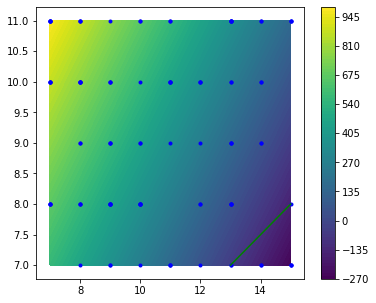

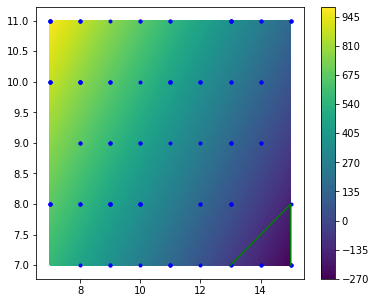

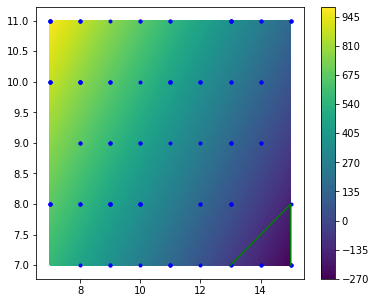

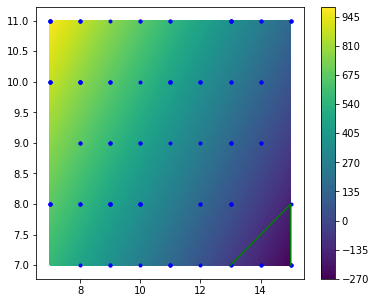

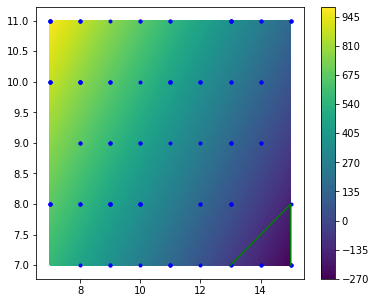

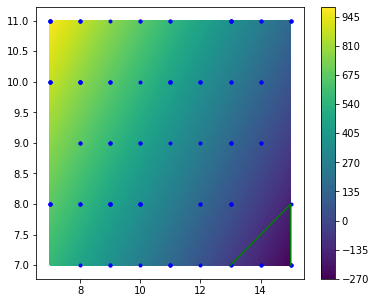

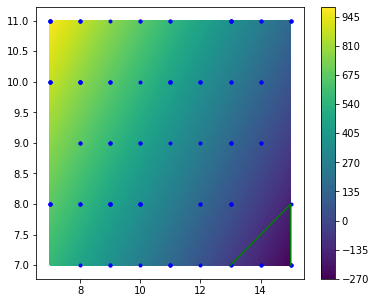

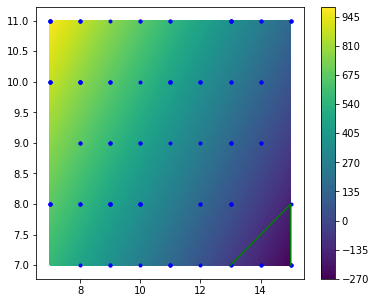

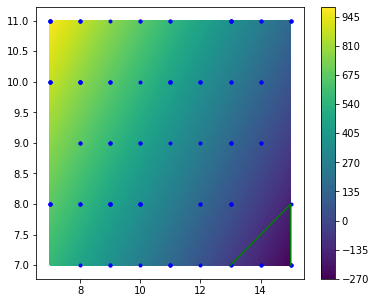

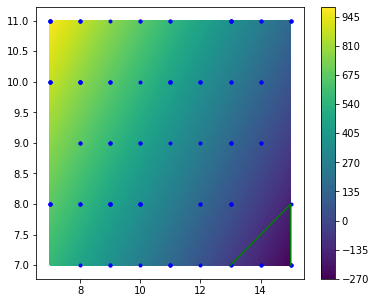

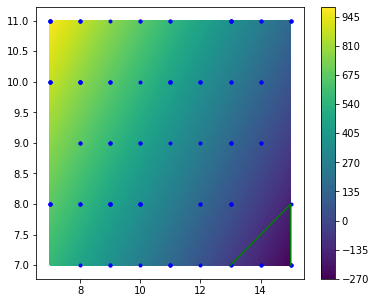

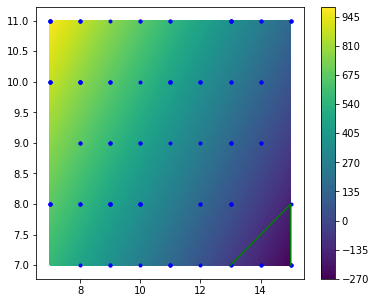

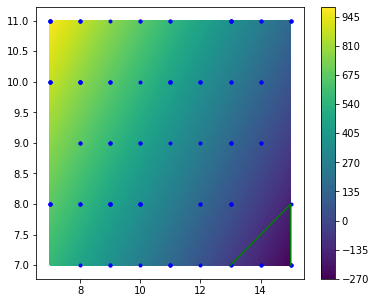

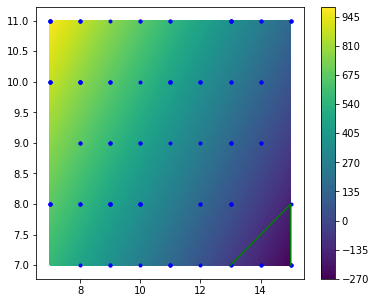

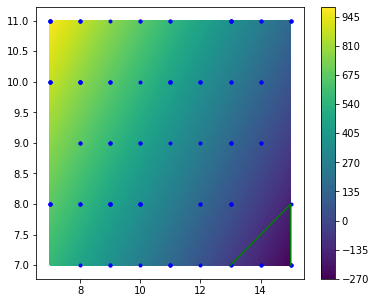

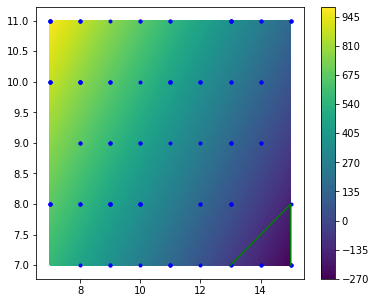

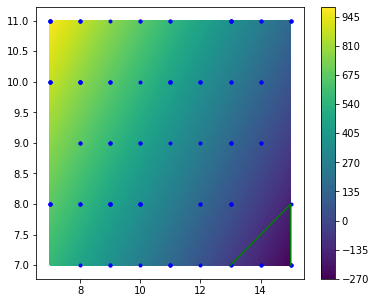

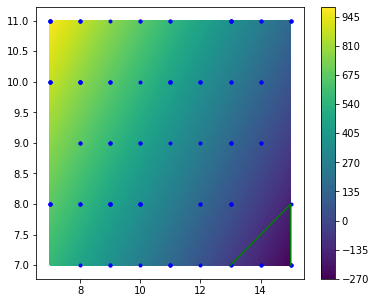

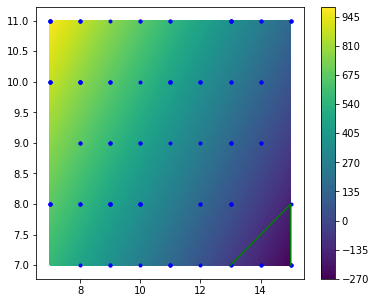

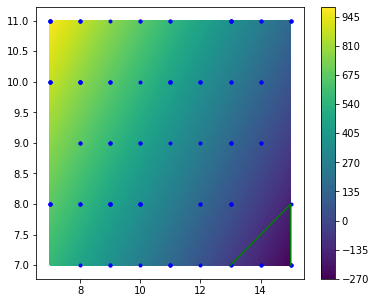

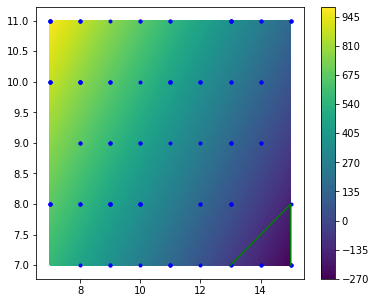

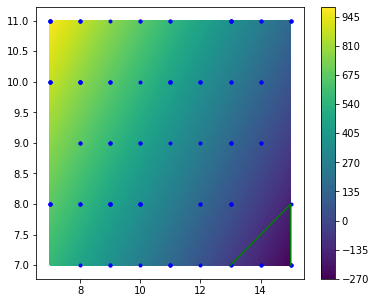

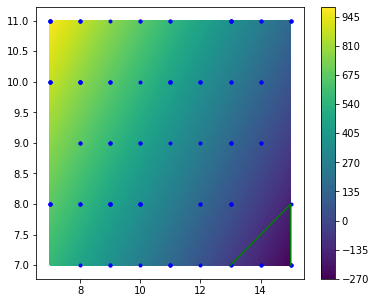

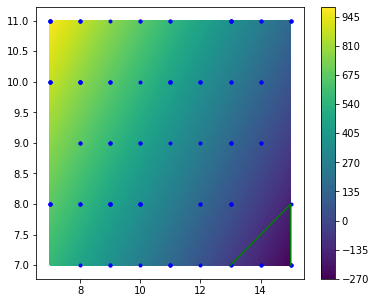

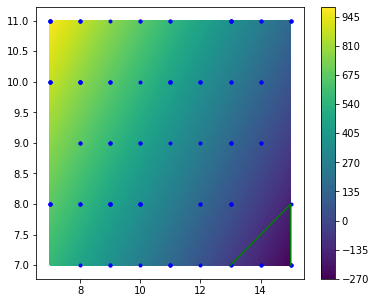

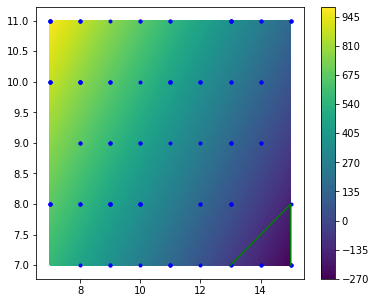

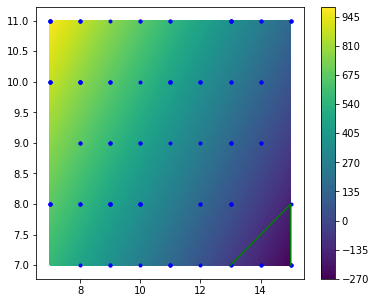

In [40]:
random.seed(41)
monte_carlo(100)

# References

[SimPy](https://simpy.readthedocs.io/en/latest/contents.html)